In [1]:
from symreg import Regressor
import numpy as np
import pandas as pd
import random

<AxesSubplot:xlabel='0', ylabel='1'>

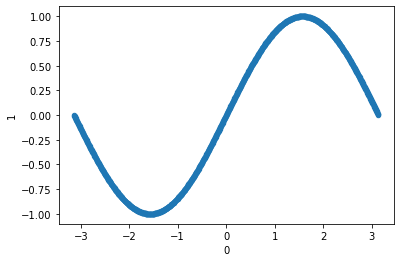

In [2]:
X = pd.Series(np.linspace(-3.14, 3.14, 1001))
y = pd.Series(np.sin(X))
sine = pd.concat([X, y], axis=1)
sine.plot.scatter(x=0, y=1)

In [3]:
np.array(sine[0])

array([-3.14   , -3.13372, -3.12744, ...,  3.12744,  3.13372,  3.14   ])

## Approximate sin(x) without using the sin function

In [4]:
random.seed(0)
r = Regressor(verbose=True, duration=20, simplify_chance=.1)
r.fit(X, y)

Time left  : 18.99s
Best so far: (0.44312197286804483, 26) (error, complexity)
Time left  : 17.99s
Best so far: (0.0836917039732914, 20) (error, complexity)
Time left  : 16.98s
Best so far: (0.06208016582853509, 134) (error, complexity)
Time left  : 15.96s
Best so far: (0.04264417402508506, 132) (error, complexity)
Time left  : 14.93s
Best so far: (0.03904615604168395, 195) (error, complexity)
Time left  : 13.89s
Best so far: (0.034529487079478415, 433) (error, complexity)
Time left  : 12.78s
Best so far: (0.0288798377871038, 538) (error, complexity)
Time left  : 11.60s
Best so far: (0.02515504420892108, 698) (error, complexity)
Time left  : 10.54s
Best so far: (0.01905762252882996, 488) (error, complexity)
Time left  : 9.44s
Best so far: (0.018971505687241152, 1285) (error, complexity)
Time left  : 8.38s
Best so far: (0.018387863644480237, 370) (error, complexity)
Time left  : 7.36s
Best so far: (0.017029773026842478, 349) (error, complexity)
Time left  : 6.35s
Best so far: (0.0167219

In [5]:
r.results()

[{'error': 0.7069327069679745, 'complexity': 1, 'program': Program('0', 1)},
 {'error': 0.4443260081376294,
  'complexity': 3,
  'program': Program('mul $0 0.3212672193654959', 1)},
 {'error': 0.44315756791935385,
  'complexity': 7,
  'program': Program('add mul 0.07845343434530716 $0 mul $0 0.22457267457542088', 1)},
 {'error': 0.44315750279260263,
  'complexity': 11,
  'program': Program('add mul 0.07845343434530716 sub $0 mul $0 -0.00023270628446490585 mul $0 0.22457267457542088', 1)},
 {'error': 0.44315684283218537,
  'complexity': 13,
  'program': Program('add mul 0.07845343434530716 sub $0 mul mul $0 15.285779729250047 -0.00023270628446490585 mul $0 0.22457267457542088', 1)},
 {'error': 0.38802630451560427,
  'complexity': 14,
  'program': Program('add mul 0.07845343434530716 mul mul $0 neg mul $0 0.22457267457542088 $0 mul $0 0.3303773027105544', 1)},
 {'error': 0.3615942621605588,
  'complexity': 18,
  'program': Program('add mul 0.07845343434530716 $0 add mul 0.078453434345307

<AxesSubplot:xlabel='0'>

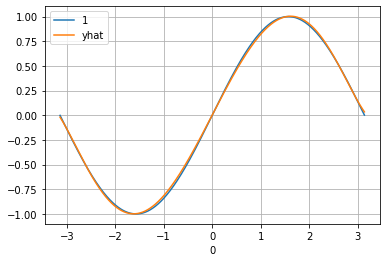

In [6]:
sine['yhat'] = r.predict(sine.iloc[:, 0])
sine.set_index(0).plot(grid=True)

As you can see, the function is a very good fit. But a complexity of 337 has its disadvantages: it may be overfit. As soon as we go outside the trained interval, there are explosions:

<AxesSubplot:xlabel='x'>

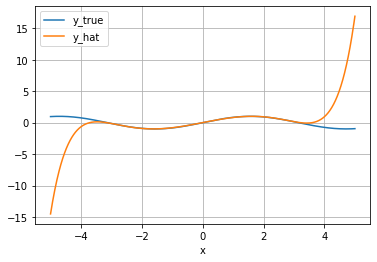

In [7]:
sine_larger = pd.DataFrame({'x': np.linspace(-5, 5, 1001)})
sine_larger['y_true'] = np.sin(sine_larger['x'])
sine_larger['y_hat'] = r.predict(sine_larger['x'])
sine_larger.set_index('x').plot(grid=True)

Limiting the predictor complexity with `max_complexity` acts similarly to [regularization of neural networks](https://towardsdatascience.com/how-to-improve-a-neural-network-with-regularization-8a18ecda9fe3). The behavior on the outside is a bit tamer now - +/- 6 instead of +/- 15.

<AxesSubplot:xlabel='x'>

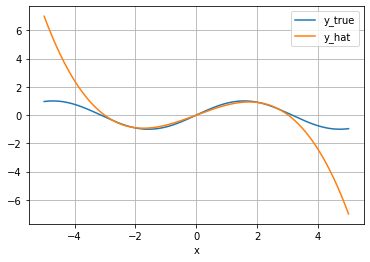

In [8]:
sine_larger = pd.DataFrame({'x': np.linspace(-5, 5, 1001)})
sine_larger['y_true'] = np.sin(sine_larger['x'])
sine_larger['y_hat'] = r.predict(sine_larger['x'], max_complexity=20)
sine_larger.set_index('x').plot(grid=True)